Aim of the Project : To Develop a Machine Learning Framework Model In Order to Evaluate Strength of Cement Composite.

Introduction:-
Concrete is the second-most used raw material in the world, after water. Concrete's usefulness comes mainly from its **compressive strength**. In this notebook, we can analyze the relationships between the ingredients in concrete and its age with our target variable, its strength.After analysis, we will choose, tune, and train a machine learning model to predict concrete strengths based on the other available information in the dataset.

Dataset Information :- The Dataset Is Collected from Kaggle Platform. 

In [1]:
# Import Python Libraries
import numpy as np
import pandas as pd
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Import Dataset using Pandas Function

df = pd.read_csv('composite.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# Drawing Inference from the Above Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Observation:
1. The Above Dataset Contains Total 9 Columns, Out of these 9 Columns Strength Column Considered as Target.
2. All the Columns having Numerical Data i.e. Categorical columns are absents in the present dataset.
3. No Null value present in the dataset, Since all features contains 1030 Rows.

In [4]:
# Rename the Columns Name
df_col = ['Cement','Slag','Fly_ash','Water','Superpliaticizer','Coarse_agg','Fine_agg','Age','Strength']
df.columns = df_col
df.head()

,Cement,Slag,Fly_ash,Water,Superpliaticizer,Coarse_agg,Fine_agg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# Checking the Descriptive Statistics 
df.describe()

,Cement,Slag,Fly_ash,Water,Superpliaticizer,Coarse_agg,Fine_agg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
# Cross check for NA Values in the feature columns
for col in df.columns:
    pct_na = np.mean(df[col].isna())
    print('{} has {} % NA values'.format(col, pct_na))

Cement has 0.0 % NA values
Slag has 0.0 % NA values
Fly_ash has 0.0 % NA values
Water has 0.0 % NA values
Superpliaticizer has 0.0 % NA values
Coarse_agg has 0.0 % NA values
Fine_agg has 0.0 % NA values
Age has 0.0 % NA values
Strength has 0.0 % NA values


In [7]:
# Check for Any Duplicate Rows
df.duplicated().sum()

25

Observation:-
1. As 25 Duplicated Values found in the Dataset. Hence we can drop the duplicated rows.

In [8]:
# Dropping the Duplicated Rows from the Dataset
df = df.drop_duplicates()
df.shape

(1005, 9)

In [9]:
# Again Cross Check Descriptive Stats for New Data
df.describe()

,Cement,Slag,Fly_ash,Water,Superpliaticizer,Coarse_agg,Fine_agg,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


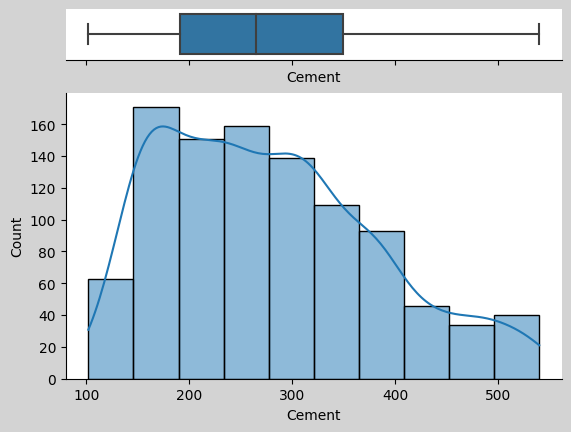

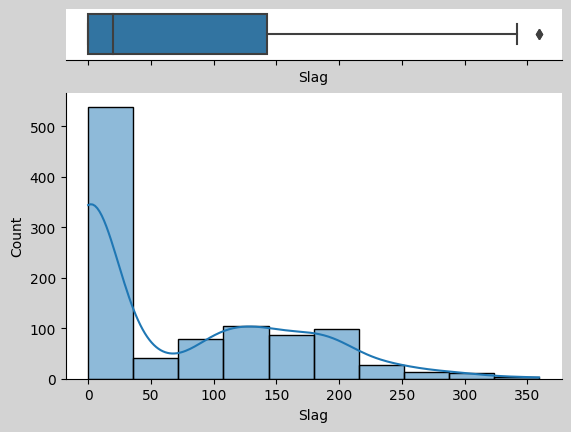

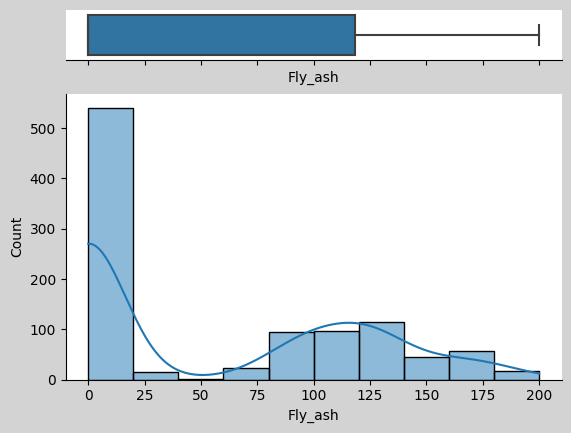

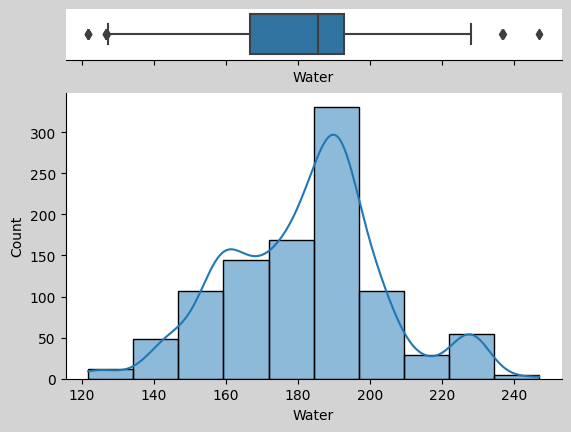

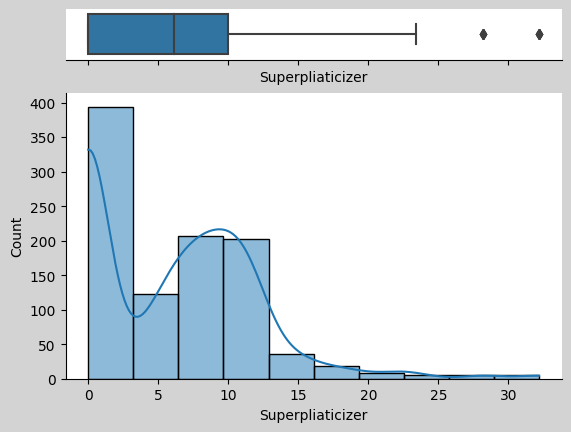

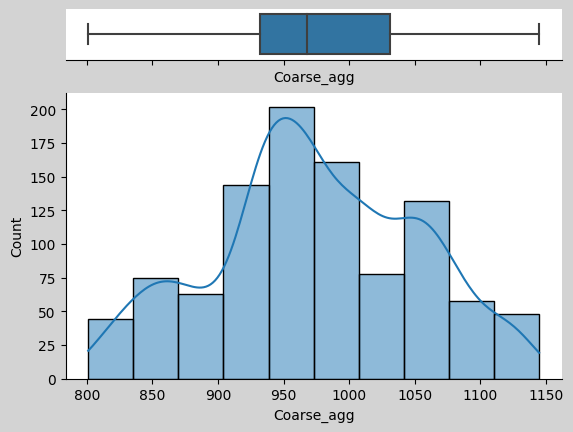

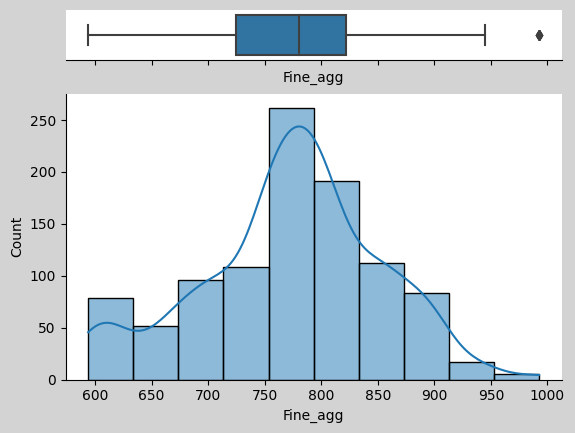

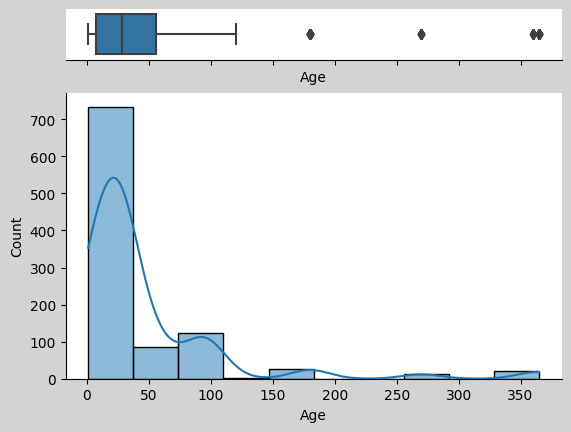

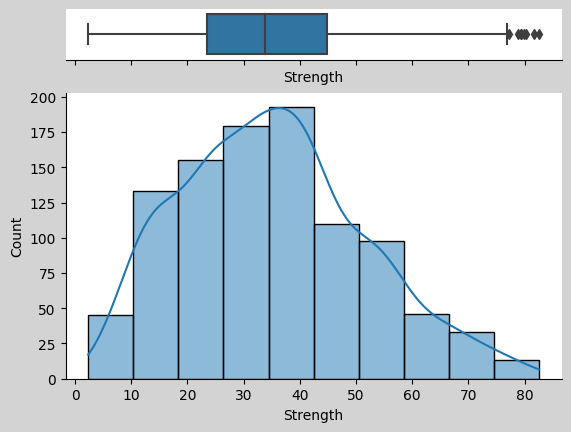

In [10]:
# Data Visualization 
for column in df:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},facecolor = 'lightgray')

    sns.boxplot(x=df[column], ax=ax_box)
    sns.histplot(x=df[column], bins=10, kde=True, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

Obervation:
1. In our Dataset - slag, flyash, and superplasticizer have many zero values. This is to be expected as they are not strictly necessary in structural concrete, but are used as additives for various reasons.

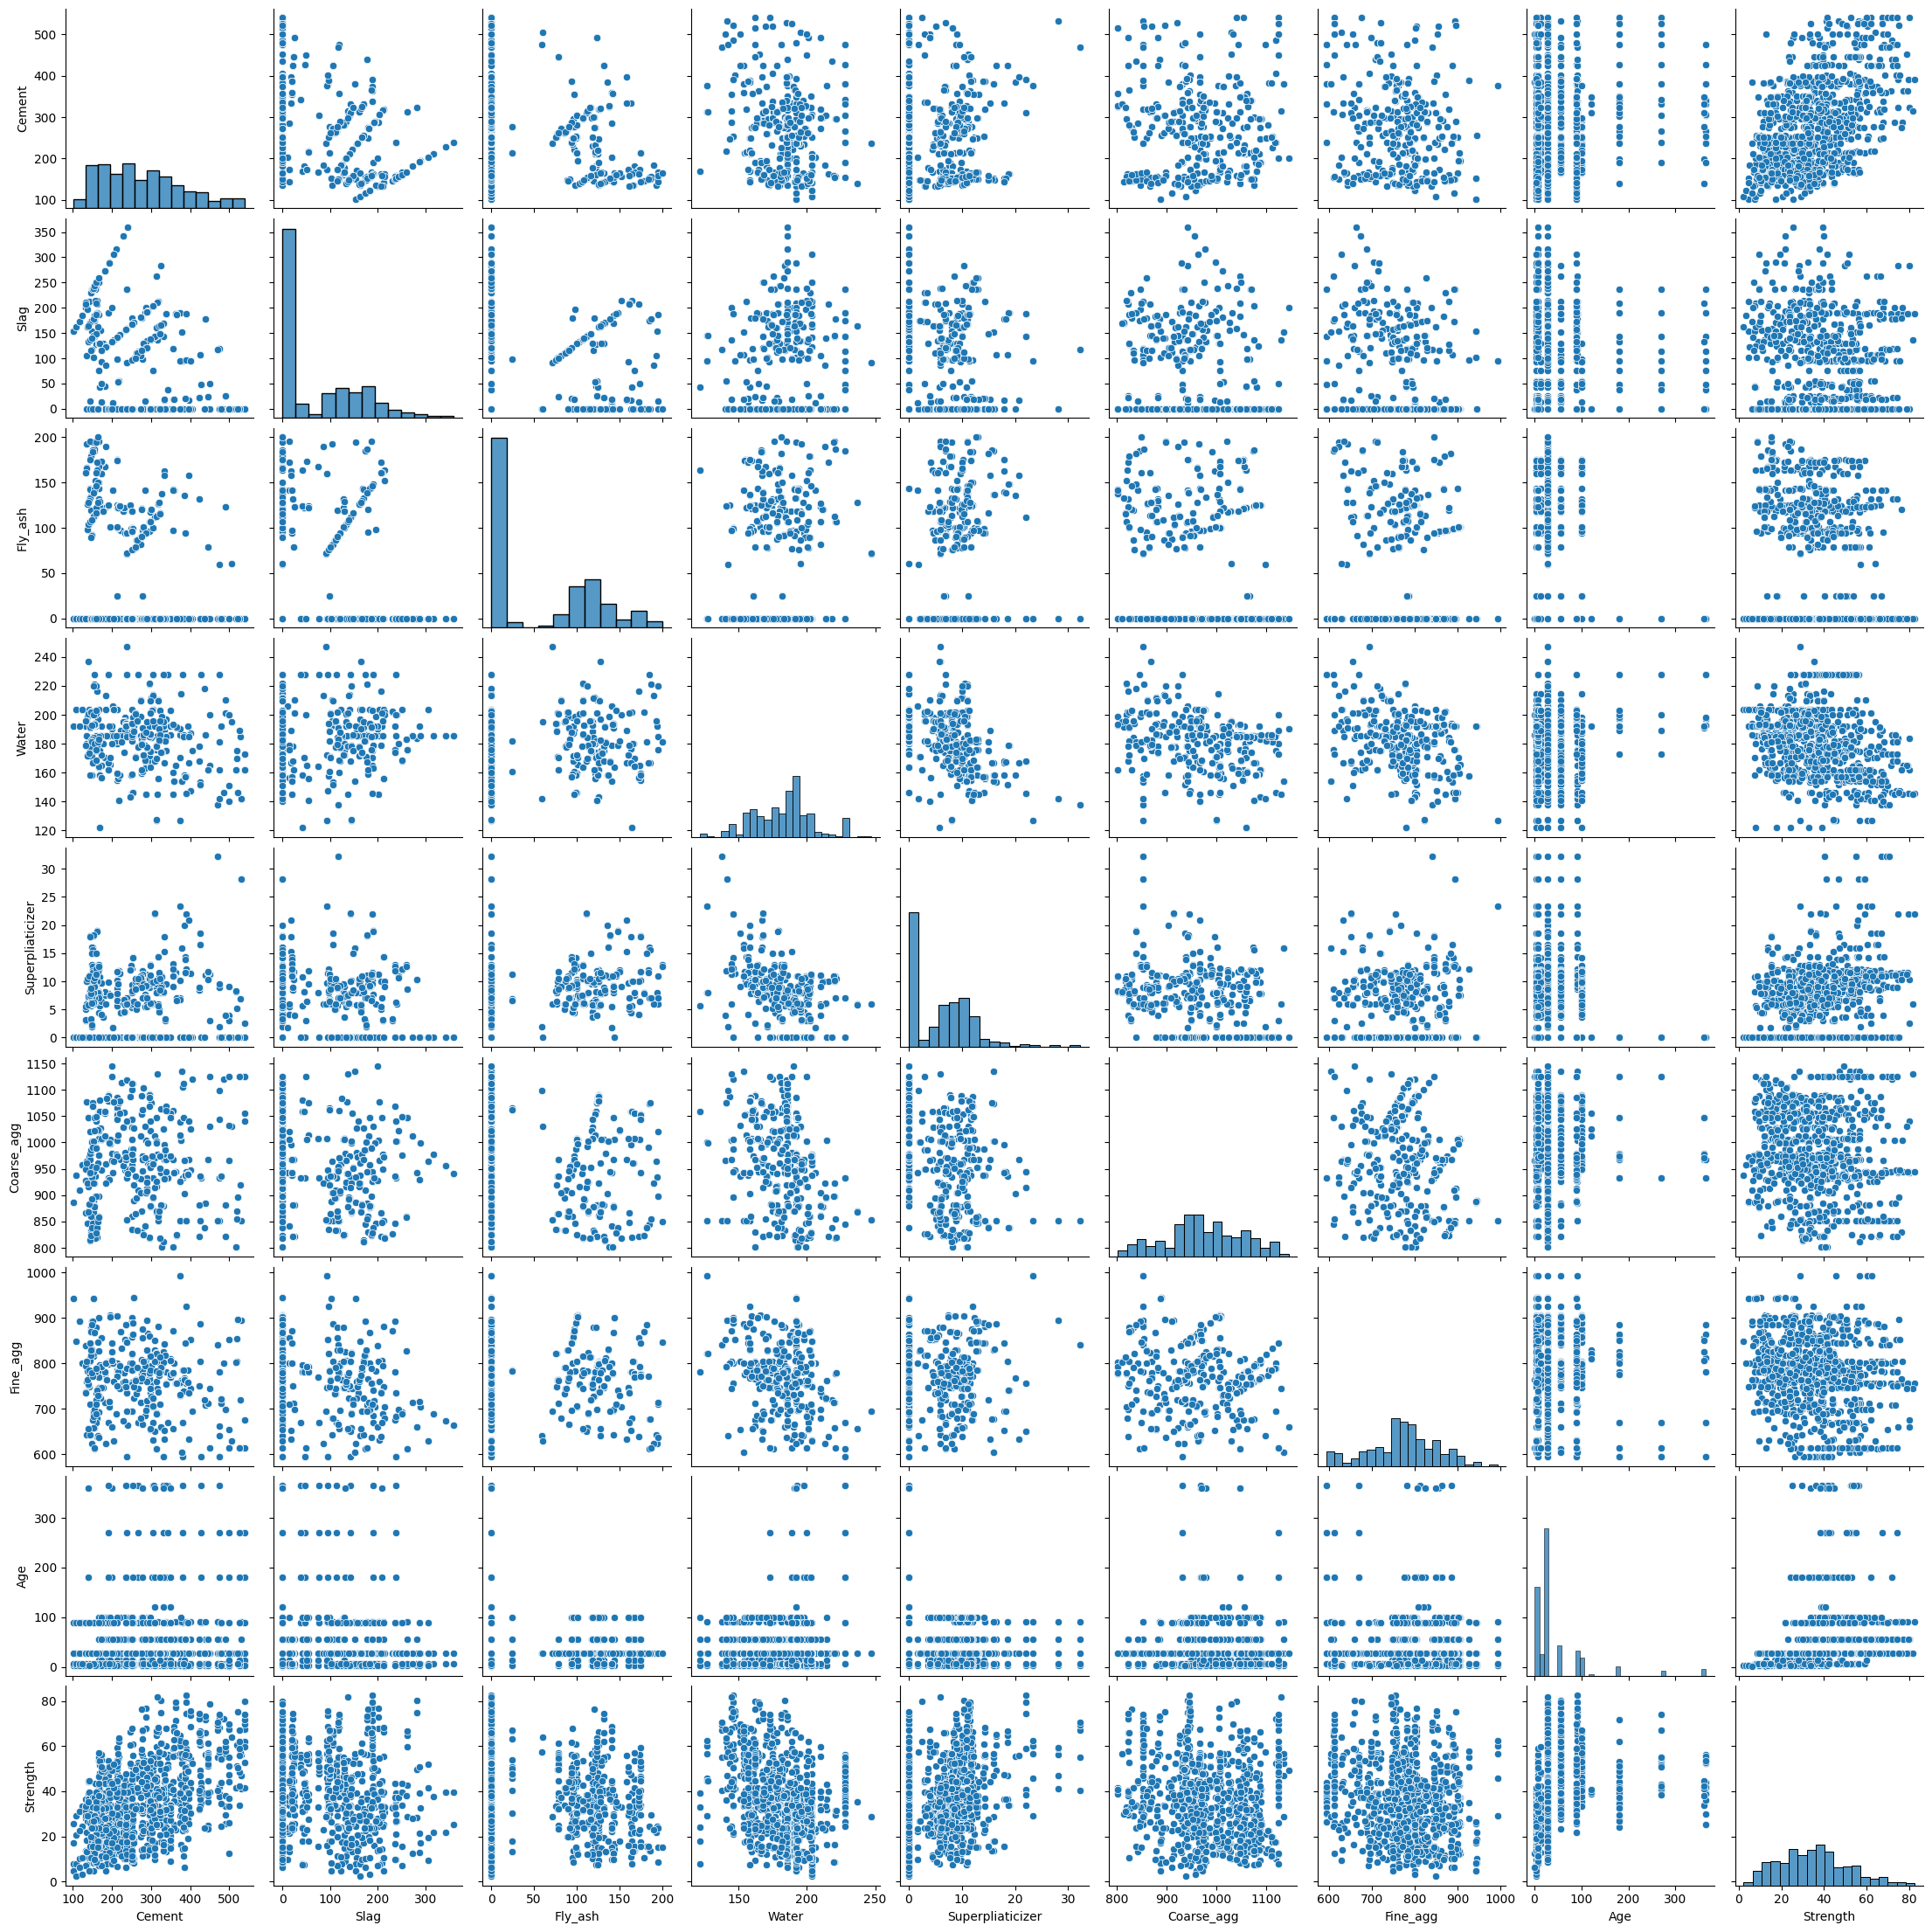

In [11]:
# Analyze The Relationship Between Independent Features and Dependent Features

sns.pairplot(df)
plt.show()

Observation:-
* An apparent linear relationship between cement and strength.
* Perhaps a negative linear relationship between superplasticizer and water.
* The discrete ages that compressive strength tests were performed.
* To see the discrete relation between ages and strength, Violine Plot Recommended. 


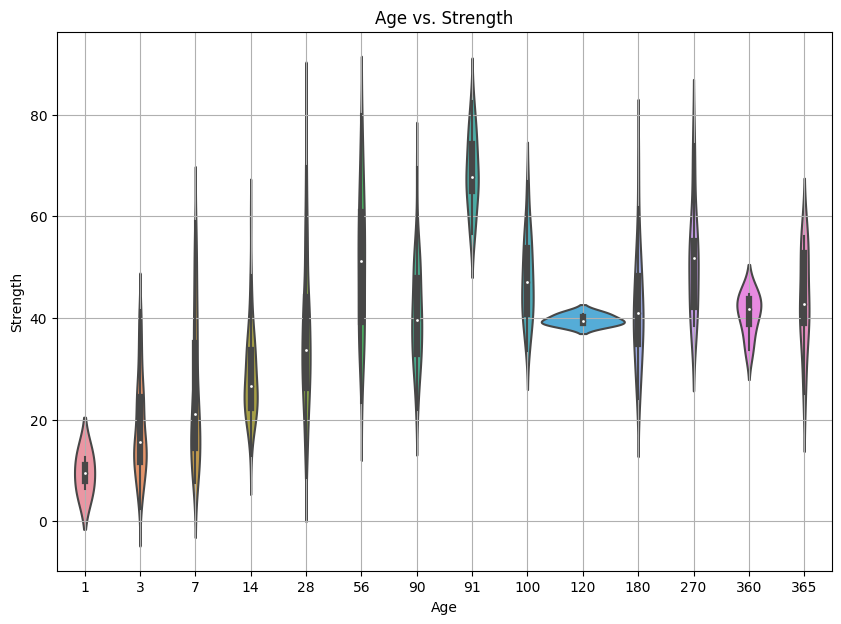

In [12]:
plt.figure(figsize=(10,7), label='Age vs. Strength')
plt.title('Age vs. Strength')
sns.violinplot(data=df, x="Age", y="Strength", width=1.5)
plt.grid()
plt.show()

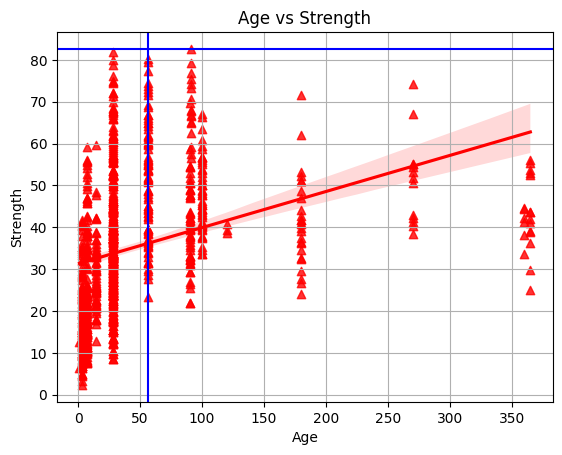

In [13]:
sns.regplot(x = df.Age,y=df.Strength,color = 'red',marker='^')
plt.axhline(82.5992248,color = 'blue')
plt.axvline(56,color = 'blue')
plt.title('Age vs Strength')
plt.grid()
plt.show()

Observation:-
1. Violin plot shows a positive correlation between age and strength, which later levels off after ~101 days.
2. As Mentioned by One of the Research Paper Title 'AGE AND COMPRESSIVE STRENGTH OF CONCRETE FROM VARIOUS BRANDS OF PORTLAND COMPOSITE CEMENT (PCC)' by author I.Wayan Intara et.al :- The targeted characteristics compressive strength is achieved at age 56 days, all brands of cement

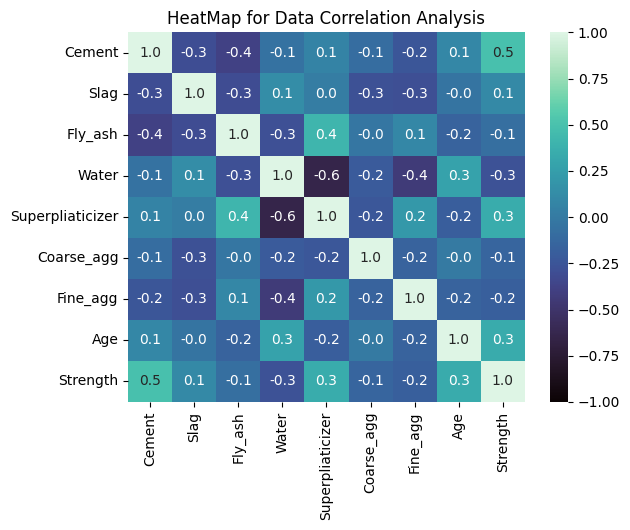

In [14]:
# Heatmap for Correlation Analysis
sns.heatmap(df.corr(),annot=True,cmap='mako',vmax =1,vmin =-1,center =0,fmt=".1f")
plt.title('HeatMap for Data Correlation Analysis')
plt.show() 

In [15]:
# Pearson Correlation Table 
import scipy.stats
correlations = []
for col in df.columns.drop('Strength'):
    val = scipy.stats.pearsonr(df[col],df.Strength)[0]
    correlations.append({
        'Feature':col,
        'Correlation with Strength':val
    })
    
pd.DataFrame(correlations).sort_values('Correlation with Strength', ascending=False)

,Feature,Correlation with Strength
0,Cement,0.488283
4,Superpliaticizer,0.344225
7,Age,0.337371
1,Slag,0.103370
2,Fly_ash,-0.080648
5,Coarse_agg,-0.144710
6,Fine_agg,-0.186457
3,Water,-0.269606


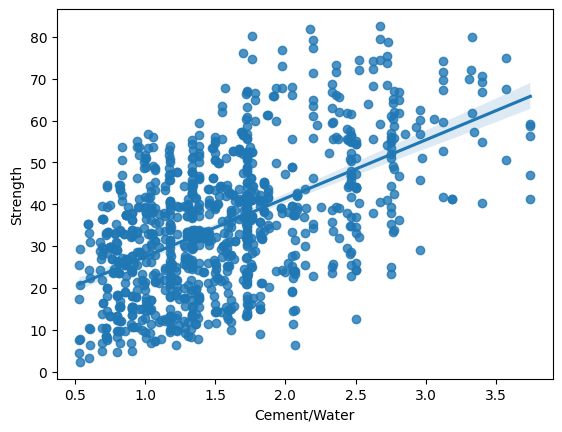

In [16]:
# Feature Engineering
var  = (df.Cement)/(df.Water)
sns.regplot(x = var,y = df.Strength)
plt.xlabel('Cement/Water')
plt.ylabel('Strength')
plt.show()

Note:-
1. As var = Cement/Water shows good agreement w.r.t Strength so we need to create a new column to predict the strength property.

In [17]:
# Creating New Column in our Dataset
df['C/W'] = var
df.head()

,Cement,Slag,Fly_ash,Water,Superpliaticizer,Coarse_agg,Fine_agg,Age,Strength,C/W
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,3.333333
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,3.333333
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,1.458333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,1.458333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,1.034375


In [18]:
df.head()

,Cement,Slag,Fly_ash,Water,Superpliaticizer,Coarse_agg,Fine_agg,Age,Strength,C/W
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,3.333333
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,3.333333
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,1.458333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,1.458333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,1.034375


In [19]:
# Rearranging the Columns 
df.columns   
df = df[['Cement', 'Slag', 'Fly_ash', 'Water', 'Superpliaticizer', 'Coarse_agg',
       'Fine_agg', 'Age', 'C/W','Strength' ]]
df.head()

,Cement,Slag,Fly_ash,Water,Superpliaticizer,Coarse_agg,Fine_agg,Age,C/W,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,3.333333,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,3.333333,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,1.458333,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,1.458333,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1.034375,44.296075


FEATURE SCALING 

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split Data set into Independent Features and Dependent Feature

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
!pip install XGBoost
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [24]:
# Use KFold CV Technique on Different Models

def CVFold(models):
    score = cross_val_score(model,X_train,y_train,cv=CV,scoring = 'r2')
    print("Baseline mean R-squared from K-fold CV of {} is {}".format(model, round(np.mean(score), 4)))

In [25]:

CV = KFold(n_splits=5, shuffle=True, random_state=23)

In [26]:
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]
for model in models:
    CVFold(models)

Baseline mean R-squared from K-fold CV of LinearRegression() is 0.6001
Baseline mean R-squared from K-fold CV of Ridge() is 0.5978
Baseline mean R-squared from K-fold CV of Lasso() is 0.2013
Baseline mean R-squared from K-fold CV of DecisionTreeRegressor() is 0.7887
Baseline mean R-squared from K-fold CV of RandomForestRegressor() is 0.8795
Baseline mean R-squared from K-fold CV of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=N

HYPER PARAMETER TUNING

In [27]:
def TestXGBParams(**params):
    score = cross_val_score(XGBRegressor(**params, n_jobs=-1, random_state=23), X_train, y_train, cv= CV, scoring="r2")
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))


In [28]:
estimators = [1,2,4,8,16,32,64,120,125,127,130,133,140,150,200,256]
for n in estimators:
    TestXGBParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is -2.0014
Mean R-squared from K-fold CV with {'n_estimators': 2} is -0.6152
Mean R-squared from K-fold CV with {'n_estimators': 4} is 0.4655
Mean R-squared from K-fold CV with {'n_estimators': 8} is 0.8399
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.8874
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.8944
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.897
Mean R-squared from K-fold CV with {'n_estimators': 120} is 0.8967
Mean R-squared from K-fold CV with {'n_estimators': 125} is 0.8967
Mean R-squared from K-fold CV with {'n_estimators': 127} is 0.8967
Mean R-squared from K-fold CV with {'n_estimators': 130} is 0.8967
Mean R-squared from K-fold CV with {'n_estimators': 133} is 0.8966
Mean R-squared from K-fold CV with {'n_estimators': 140} is 0.8967
Mean R-squared from K-fold CV with {'n_estimators': 150} is 0.8967
Mean R-squared from K-fold CV with {'n_estimators': 200} is 0.8967
Mean 

In [29]:
depths = [1, 2, 4,6,8,10,12,14,16,20,25]
for n in depths:
    TestXGBParams(n_estimators = 120, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 1} is 0.8671
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 2} is 0.8992
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 4} is 0.9028
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 6} is 0.8967
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 8} is 0.8921
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 10} is 0.8877
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 12} is 0.8867
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 14} is 0.8864
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 16} is 0.8869
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 20} is 0.8864
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 25} is 0.8866


In [30]:
rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for n in rates:
    TestXGBParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.1} is 0.9034
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.2} is 0.9071
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.9032
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.4} is 0.9
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.5} is 0.8931
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.6} is 0.89
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.7} is 0.8722
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.8} is 0.8705
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.9} is 0.8574
Mean R-squared from K-fold CV with {'n_estimators': 128, 'ma

In [31]:
model = XGBRegressor(n_estimators = 128, max_depth = 4, learning_rate = .2, n_jobs=-1, random_state = 23)

In [32]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=128, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=23, ...)

In [33]:
# Test DataSet Prediction 
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test,y_pred)

print('Our Optimized XGBRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized XGBRegressor got the following scores on the test set:
R-squared: 0.924079396992493
MSE: 21.823142235350232
RMSE: 4.671524615727742
MAE: 3.08202335264153


In [34]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
8,C/W,0.387013
7,Age,0.236697
4,Superpliaticizer,0.105144
1,Slag,0.103201
0,Cement,0.059300
6,Fine_agg,0.040680
3,Water,0.031685
5,Coarse_agg,0.020069
2,Fly_ash,0.016212


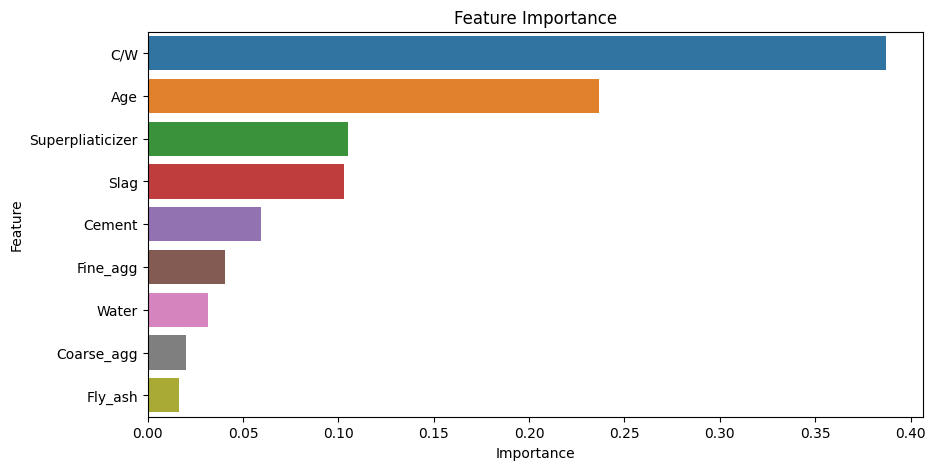

In [35]:
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');

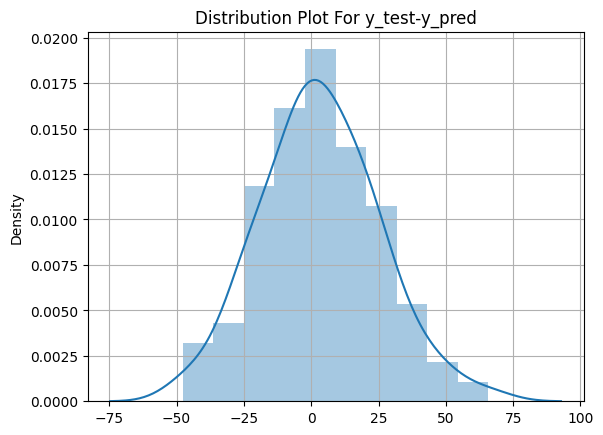

In [36]:
# Converting array into DataFrame
y_pred = pd.DataFrame(y_pred,columns = y_test.columns) 
sns.distplot(y_test-y_pred)
plt.title('Distribution Plot For y_test-y_pred')
plt.grid()
plt.show()